# Investigating Gun Deaths in the US
In this project we'll be looking at a dataset of gun deaths statistics for the US. The goal is to organize the data, then explore it by categories such as intent (suicide, homicide, accidental) and/or race, sex and education of the victim.

### Data read-in

In [41]:
import csv

In [42]:
# Let's import the data and check how it looks.
data = list(csv.reader(open("guns.csv", "r")))
data[:5]

[['',
  'year',
  'month',
  'intent',
  'police',
  'sex',
  'age',
  'race',
  'hispanic',
  'place',
  'education'],
 ['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]

In [43]:
#Let's separate the column headers from the data.
headers = data[0]
data = data[1:]

In [44]:
headers

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education']

In [45]:
data[:5]

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'],
 ['5',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '31',
  'White',
  '100',
  'Other specified',
  '2']]

### Gun deaths by year and month
For the first task, we'll check if there are any significant temporal trends over the three years span of the dataset. 

In [46]:
years = [x[1] for x in data]

In [47]:
year_counts = {}
for y in years:
    if y in year_counts:
        year_counts[y] += 1
    else:
        year_counts[y] = 1
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

Text(0.5,1,'Gun-related deaths by year')

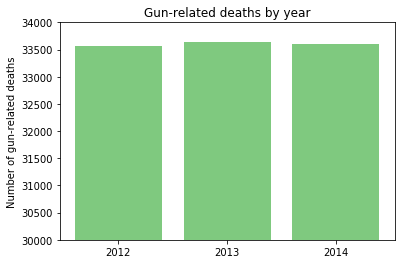

In [52]:
fig, axes = plt.subplots()
axes.bar(arange(len(year_counts))+.4,height=list(year_counts.values()),width=.8,color=plt.cm.Accent(0))
axes.set_ylim([30000,34000])
axes.set_xticks(arange(len(year_counts))+.4)
axes.set_xticklabels(year_counts.keys())
axes.set_ylabel("Number of gun-related deaths")
axes.set_title("Gun-related deaths by year")

Gun deaths seem rather uniform over the 2012-2014 period. Let's further check our data month by month. We can use the datetime library to convert the individual date components in our dataset into datetime objects.

In [53]:
import datetime
dates = [datetime.datetime(year=int(x[1]),month=int(x[2]),day=1) for x in data]
# Verify the output
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

In [54]:
# We can now consolidate the number on gun deaths per month using a dictionary
date_counts = {}
for d in dates:
    if d in date_counts:
        date_counts[d] += 1
    else:
        date_counts[d] = 1
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

It is difficult to say much about the data just by looking at the numbers like this. Let's make a new bar plot.

In [55]:
# We can now extract the dates and values and prepare them to be plotted out.
dates = []
nums = []
for i, j in date_counts.items():
    dates.append(i.strftime("%b %Y"))
    nums.append(j)

Text(0,0.5,'Number of deaths')

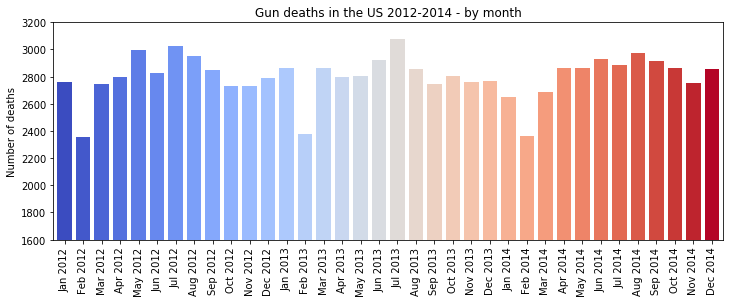

In [56]:
from numpy import linspace
colors = [plt.cm.coolwarm(i) for i in linspace(0,1,len(dates))]
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(arange(len(dates))+.4,height=nums,width=.8,color=colors)
ax.set_xlim([-.2,len(dates)])
ax.set_ylim([1600,3200])
ax.set_xticks(arange(len(dates))+.4)
ax.set_xticklabels(dates,rotation=90)
ax.set_title("Gun deaths in the US 2012-2014 - by month")
ax.set_ylabel("Number of deaths")

There's no long term increase or decrease apparent in year by year gun deaths overall. Within each year however we can see a periodicity wherein the summer months have more gun deaths than the winter months. 

A curious aspect is the data for February, which across all three years presents much fewer gun deaths than all other months. The 1 to 3 days shorter duration of this month compared to any other given month is likely to explain at least in part this discrepancy.  

### Gun deaths by gender, race and intent
We turn our attention now to other parameters, such as gender and race of the victim and the intent behind the casualty.

In [57]:
sex = [x[5] for x in data]

In [58]:
sex_counts = {}
for s in sex:
    if s in sex_counts:
        sex_counts[s] += 1
    else:
        sex_counts[s] = 1
sex_counts

{'M': 86349, 'F': 14449}

Text(0.5,1,'Gun-related deaths by gender')

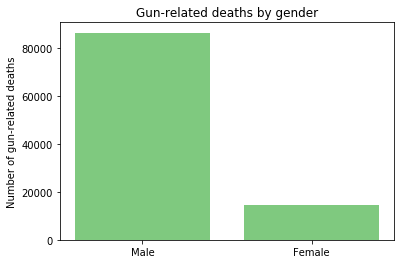

In [72]:
fig, axes = plt.subplots()
axes.bar(arange(len(sex_counts))+.4,height=list(sex_counts.values()),width=.8,color=plt.cm.Accent(0))
axes.set_xticks(arange(len(sex_counts))+.4)
axes.set_xticklabels(["Male","Female"])
axes.set_ylabel("Number of gun-related deaths")
axes.set_title("Gun-related deaths by gender")

The difference between male and female gun deaths counts is vast compared to the roughly equal male/female split we find in the general population. 85.7% of the time a gun death will involve a male rather than a female.

In [59]:
race = [x[7] for x in data]

In [60]:
race_counts = {}
for r in race:
    if r in race_counts:
        race_counts[r] += 1
    else:
        race_counts[r] = 1
race_counts

{'Asian/Pacific Islander': 1326,
 'White': 66237,
 'Native American/Native Alaskan': 917,
 'Black': 23296,
 'Hispanic': 9022}

These numbers don't tell much without comparable statistics for the general population composition. Let's import some census data that can give us this information.

In [61]:
census = list(csv.reader(open("census.csv", "r")))
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [62]:
# The following is a manual mapping of the census data to the race categories.
mapping = {
    "Asian/Pacific Islander": 674625+15159516,
    "Black": 40250635,
    "Hispanic": 44618105,
    "Native American/Native Alaskan": 3739506,
    "White": 197318956
}

In [63]:
# In this cell we divide gun deaths counts by respective popualtion fractions.
# The results are multiplied by 100000 because the numbers are quite small.
# The final results is the number of gun deaths per 100000 people, by race.
race_per_hundredk = {}
for key, val in race_counts.items():
    race_per_hundredk[key] = val/mapping[key]*100000
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'White': 33.56849303419181,
 'Native American/Native Alaskan': 24.521955573811088,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907}

Let's visualise these numbers.

Text(0.5,1,'Gun-related deaths by race')

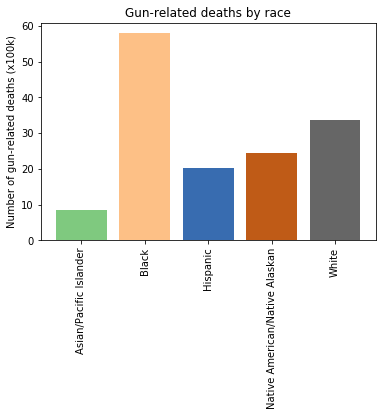

In [91]:
# Before visualising the results, let's order the categories alphabetically
arr = []
for key, val in race_per_hundredk.items():
    arr.append([key,val])
arr_s = sorted(arr)
race = [x[0] for x in arr_s]
counts = [x[1] for x in arr_s]
# The results can be plotted now
colors = [plt.cm.Accent(i) for i in linspace(0,1,len(race))]
fig, axes = plt.subplots()
axes.bar(arange(len(race))+.4,height=counts,width=.8,color=colors)
axes.set_xticks(arange(len(race))+.4)
axes.set_xticklabels(race,rotation=90)
axes.set_ylabel("Number of gun-related deaths (x100k)")
axes.set_title("Gun-related deaths by race")

As we can see, Blacks have the highest incidence of gun-related deaths (57.9 per 100k), with Whites at second place (33.7 per 100k). Native Americans/Alaskans, Hispanics and Asians follow in third (24.5 per 100k), fourth (20.2 per 100k) and fifth (8.4 per 100k) position respectively. Do these numbers change when we look into specific intent, e.g. homicide?

In [87]:
race_homicide = [x[7] for x in data if x[3] == "Homicide"]

In [88]:
homicide_race_counts = {}
for r in race_homicide:
    if r in homicide_race_counts:
        homicide_race_counts[r] += 1
    else:
        homicide_race_counts[r] = 1
homicide_race_counts

{'White': 9147,
 'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Native American/Native Alaskan': 326,
 'Hispanic': 5634}

In [89]:
homicide_race_per_hundredk = {}
for key, val in homicide_race_counts.items():
    homicide_race_per_hundredk[key] = val/mapping[key]*100000
homicide_race_per_hundredk

{'White': 4.6356417981453335,
 'Asian/Pacific Islander': 3.530346230970155,
 'Black': 48.471284987180944,
 'Native American/Native Alaskan': 8.717729026240365,
 'Hispanic': 12.627161104219914}

Text(0.5,1,'Gun-related homicides by race')

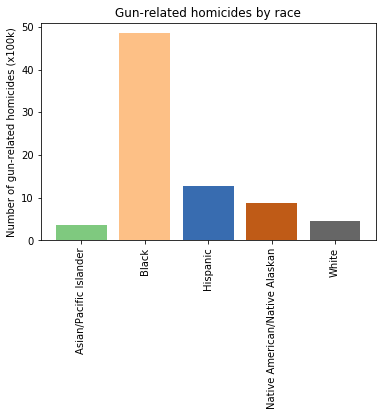

In [92]:
# Before visualising the results, let's order the categories alphabetically
arr = []
for key, val in homicide_race_per_hundredk.items():
    arr.append([key,val])
arr_s = sorted(arr)
race = [x[0] for x in arr_s]
counts = [x[1] for x in arr_s]
# The results can be plotted now
colors = [plt.cm.Accent(i) for i in linspace(0,1,len(race))]
fig, axes = plt.subplots()
axes.bar(arange(len(race))+.4,height=counts,width=.8,color=colors)
axes.set_xticks(arange(len(race))+.4)
axes.set_xticklabels(race,rotation=90)
axes.set_ylabel("Number of gun-related homicides (x100k)")
axes.set_title("Gun-related homicides by race")

When homicides are selected for, Whites fall down to fourth position with just 4.6 gun deaths per 100k and just above Asians with 3.5.

Blacks remain first with 48.5 homicide gun deaths per 100k people, meaning that homicides make up in fact a large majority of all gun deaths involving Blacks (48.5 out of 57.9, i.e. 83.8%).

### Gun deaths involving police
Police violence against Blacks and other minorities periodically makes headlines in the US news and remains a hotly debated and controversial topic. How many gun deaths in our database did in fact involve police, and how are these distributed by race?

In [93]:
race_police = [x[7] for x in data if x[4] == "1"]
len(race_police)

1402

In [94]:
race_police_counts = {}
for r in race_police:
    if r in race_police_counts:
        race_police_counts[r] += 1
    else:
        race_police_counts[r] = 1
race_police_counts

{'White': 709,
 'Native American/Native Alaskan': 25,
 'Black': 356,
 'Hispanic': 282,
 'Asian/Pacific Islander': 30}

In [95]:
race_police_per_hundredk = {}
for key, val in race_police_counts.items():
    race_police_per_hundredk[key] = val/mapping[key]*100000
race_police_per_hundredk

{'White': 0.3593167196769478,
 'Native American/Native Alaskan': 0.6685375020122979,
 'Black': 0.8844580961269306,
 'Hispanic': 0.6320304280067475,
 'Asian/Pacific Islander': 0.18946401955117112}

Text(0.5,1,'Gun-related deaths involving police, by race')

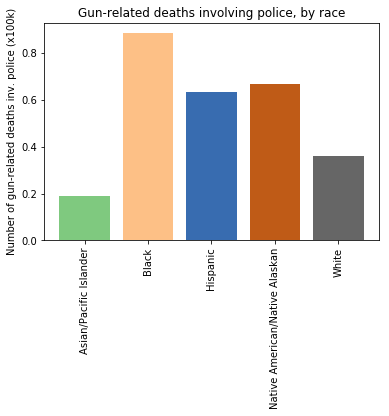

In [98]:
# Before visualising the results, let's order the categories alphabetically
arr = []
for key, val in race_police_per_hundredk.items():
    arr.append([key,val])
arr_s = sorted(arr)
race = [x[0] for x in arr_s]
counts = [x[1] for x in arr_s]
# The results can be plotted now
colors = [plt.cm.Accent(i) for i in linspace(0,1,len(race))]
fig, axes = plt.subplots()
axes.bar(arange(len(race))+.4,height=counts,width=.8,color=colors)
axes.set_xticks(arange(len(race))+.4)
axes.set_xticklabels(race,rotation=90)
axes.set_ylabel("Number of gun-related deaths inv. police (x100k)")
axes.set_title("Gun-related deaths involving police, by race")

Apart from Asians, which have only about half the number of gun deaths per million involving police that Whites have, all other minorities do have substantially larger numbers of gun deaths involving police.
- Blacks have 2.46 times the number of police-related gun deaths that Whites have.
- Hispanics have 1.76 times the number of police-related gun deaths that Whites have.
- Native Americans/alaskans have 1.86 times the number of police-related gun deaths that Whites have.

However, we must remember that we have no information on how many of these deaths involved unlawful force on the part of the police. Additionally, it is likely that these numbers reflect in no small part the crime rate distribution among the races.

### Gun deaths intent in detail: by gender
We'll be now looking in detail into the three main types of intent behind the gun deaths within our dataset. Gun deaths for which the ntent is undetermined or not available will be ignored for now.

Firstly, let's cross reference intent and gender.

In [134]:
intent_types = set([x[3] for x in data])
intent_types

{'Accidental', 'Homicide', 'NA', 'Suicide', 'Undetermined'}

In [135]:
# Remove null values and undetermined intents
clean_data = [x for x in data if x[3] in ["Homicide","Suicide","Accidental"]]
intent_types = set([x[3] for x in clean_data])
intent_types

{'Accidental', 'Homicide', 'Suicide'}

In [136]:
sex_homicide = [x[5] for x in clean_data if x[3] == "Homicide"]
homicide_sex_counts = {}
for r in sex_homicide:
    if r in homicide_sex_counts:
        homicide_sex_counts[r] += 1
    else:
        homicide_sex_counts[r] = 1
homicide_sex_percent = {}
for i, j in homicide_sex_counts.items():
    homicide_sex_percent[i] = j/len(sex_homicide)*100
homicide_sex_percent

{'M': 84.72538094155105, 'F': 15.274619058448943}

In [137]:
homicide_sex_counts

{'M': 29803, 'F': 5373}

In [138]:
sex_accidental = [x[5] for x in clean_data if x[3] == "Accidental"]
accidental_sex_counts = {}
for r in sex_accidental:
    if r in accidental_sex_counts:
        accidental_sex_counts[r] += 1
    else:
        accidental_sex_counts[r] = 1
accidental_sex_percent = {}
for i, j in accidental_sex_counts.items():
    accidental_sex_percent[i] = j/len(sex_accidental)*100
accidental_sex_percent

{'M': 86.69920683343501, 'F': 13.300793166564977}

In [139]:
accidental_sex_counts

{'M': 1421, 'F': 218}

In [140]:
sex_suicide = [x[5] for x in clean_data if x[3] == "Suicide"]
suicide_sex_counts = {}
for r in sex_suicide:
    if r in suicide_sex_counts:
        suicide_sex_counts[r] += 1
    else:
        suicide_sex_counts[r] = 1
suicide_sex_percent = {}
for i, j in suicide_sex_counts.items():
    suicide_sex_percent[i] = j/len(sex_suicide)*100
suicide_sex_percent

{'M': 86.24614166996439, 'F': 13.753858330035614}

In [141]:
suicide_sex_counts

{'M': 54486, 'F': 8689}

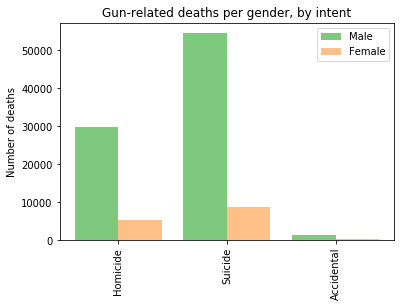

In [142]:
# Let's consolidate data before visualising it.
M = [homicide_sex_counts["M"],suicide_sex_counts["M"],accidental_sex_counts["M"]]
F = [homicide_sex_counts["F"],suicide_sex_counts["F"],accidental_sex_counts["F"]]
labels = ["Homicide","Suicide","Accidental"]
# The results can be plotted now
fig, axes = plt.subplots()
f1 = axes.bar(arange(len(M)),height=M,width=.4,color=plt.cm.Accent(0),label="Male")
f2 = axes.bar(arange(len(F))+.4,height=F,width=.4,color=plt.cm.Accent(.3),label="Female")
axes.set_xticks(arange(len(M))+.2)
axes.set_xticklabels(labels,rotation=90)
axes.set_ylabel("Number of deaths")
axes.set_title("Gun-related deaths per gender, by intent")
axes.legend()

The discrepancy between male and female gun deaths remains largely consistent across suicides, homicides and accidental deaths. This information can be interpreted in multiple ways:
- Female individuals are generally less involved in acts of gun violence, and possibly less involved in acts of violence in general.
- Accidental gun deaths involving females are also very few compared to those involving males. This indicates that female individuals are less interested in guns, and/or own fewer guns on average, and/or spend less time around guns on average than males.
- Suicides involving guns are also largely skewed towards males (6.27x). Although statistically males do indeed die by suicide much more often than females, the discrepancy (3.39x - [see this page](https://en.wikipedia.org/wiki/Suicide_in_the_United_States)) is not as large as the one visible here. This may indicate that guns are more typically a masculine tool for suicide.

### Gun deaths intent in detail: by education
Secondly, let's cross reference intent and education. This is much less straightforward than it is for gender, because the general population split between males and females can be easily assumed as equal, while for education rates we need specific census data.

Before worrying about that though, let's clean up the dataset - not all values in the 'education' column are useful.

In [115]:
education = [x[10] for x in data]
set(education)

{'1', '2', '3', '4', '5', 'NA'}

The values correspond respectively to:
- 1: less than High School
- 2: graduated from High School
- 3: some College
- 4: at least graduated from College
- 5: data not available

It also looks like there are some null values in the dataset. Let's keep only gun deaths with 'education' values from 1 to 4.

In [118]:
clean_data = [x for x in data if x[10] in ["1","2","3","4"]]
clean_data[:3] # Check that everything worked out correctly

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4']]

The US Census Bureau is the go-to source for publicly available statistics on the US population. We'll be using [educational attainment census data from 2014](https://www2.census.gov/programs-surveys/demo/tables/educational-attainment/2014/cps-detailed-tables/table-1-01.xlsx), the last year in our dataset.

Specifically, we'll be looking at the entire population 18 years old and over, of both sexes and all races.

In [119]:
# The following is a manual mapping of the census data to the education categories.
mapping = {
    "1": 29509000,
    "2": 70919000,
    "3": 46484000,
    "4": 92429000 # NOTE: Associate's degrees are here considered as "graduated from College"
}

In [124]:
education_deaths = [x[10] for x in clean_data]
education_counts = {}
for r in education_deaths:
    if r in education_counts:
        education_counts[r] += 1
    else:
        education_counts[r] = 1
education_deaths_per_hundredk = {}
for key, val in education_counts.items():
    education_deaths_per_hundredk[key] = val/mapping[key]*100000
education_deaths_per_hundredk

{'4': 14.006426554436379,
 '3': 46.639703984166594,
 '2': 60.529618296930295,
 '1': 73.95370903792063}

In [120]:
education_homicide = [x[10] for x in clean_data if x[3] == "Homicide"]
education_homicide_counts = {}
for r in education_homicide:
    if r in education_homicide_counts:
        education_homicide_counts[r] += 1
    else:
        education_homicide_counts[r] = 1
education_homicide_per_hundredk = {}
for key, val in education_homicide_counts.items():
    education_homicide_per_hundredk[key] = val/mapping[key]*100000
education_homicide_per_hundredk

{'2': 22.066018979399033,
 '3': 12.13320712503227,
 '1': 40.119963400996305,
 '4': 1.6867000616689567}

In [122]:
education_suicide = [x[10] for x in clean_data if x[3] == "Suicide"]
education_suicide_counts = {}
for r in education_suicide:
    if r in education_suicide_counts:
        education_suicide_counts[r] += 1
    else:
        education_suicide_counts[r] = 1
education_suicide_per_hundredk = {}
for key, val in education_suicide_counts.items():
    education_suicide_per_hundredk[key] = val/mapping[key]*100000
education_suicide_per_hundredk

{'4': 12.060067727661233,
 '3': 33.41579898459685,
 '2': 37.11417250666253,
 '1': 31.488698363211224}

In [123]:
education_accidental = [x[10] for x in clean_data if x[3] == "Accidental"]
education_accidental_counts = {}
for r in education_accidental:
    if r in education_accidental_counts:
        education_accidental_counts[r] += 1
    else:
        education_accidental_counts[r] = 1
education_accidental_per_hundredk = {}
for key, val in education_accidental_counts.items():
    education_accidental_per_hundredk[key] = val/mapping[key]*100000
education_accidental_per_hundredk

{'3': 0.7034678599087858,
 '1': 1.6672879460503578,
 '2': 0.8925675770949958,
 '4': 0.15795908210626536}

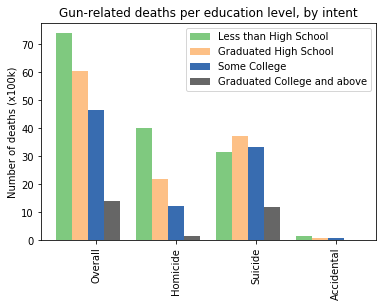

In [145]:
# Let's consolidate data before visualising it.
E1 = [education_deaths_per_hundredk["1"],education_homicide_per_hundredk["1"],education_suicide_per_hundredk["1"],education_accidental_per_hundredk["1"]]
E2 = [education_deaths_per_hundredk["2"],education_homicide_per_hundredk["2"],education_suicide_per_hundredk["2"],education_accidental_per_hundredk["2"]]
E3 = [education_deaths_per_hundredk["3"],education_homicide_per_hundredk["3"],education_suicide_per_hundredk["3"],education_accidental_per_hundredk["3"]]
E4 = [education_deaths_per_hundredk["4"],education_homicide_per_hundredk["4"],education_suicide_per_hundredk["4"],education_accidental_per_hundredk["4"]]
labels = ["Overall","Homicide","Suicide","Accidental"]
# The results can be plotted now
fig, axes = plt.subplots()
f1 = axes.bar(arange(len(E1))-.2,height=E1,width=.2,color=plt.cm.Accent(0),label="Less than High School")
f2 = axes.bar(arange(len(E2)),height=E2,width=.2,color=plt.cm.Accent(.3),label="Graduated High School")
f2 = axes.bar(arange(len(E3))+.2,height=E3,width=.2,color=plt.cm.Accent(.6),label="Some College")
f2 = axes.bar(arange(len(E4))+.4,height=E4,width=.2,color=plt.cm.Accent(.9),label="Graduated College and above")
axes.set_xticks(arange(len(E1))+.2)
axes.set_xticklabels(labels,rotation=90)
axes.set_ylabel("Number of deaths (x100k)")
axes.set_title("Gun-related deaths per education level, by intent")
axes.legend()

We can observe that:
- The number of gun-related deaths per 100k people decreases as the education level increases. 
- The ratio of homicides to suicides decreases as the education increases, to the point where a majority of gun-related deaths for people with a less-than-High-School education are homicides, while the near-entirety of gun-related deaths in people which graduated from College are suicides.

Some further notes:
- It should be noted that [Whites and American Indians/Alaskans are far more likely to commit suicide than Blacks, Asians and Hispanics are](https://en.wikipedia.org/wiki/Suicide_in_the_United_States). Furthermore, education rates are not equally distributed among races. Further avenues of analysis would thus employ a breakdown of education rates by race, and may further include race-specific suicide rates. Gender could also be an important factor to consider.
- The educational attainment data provided by the US Census Bureau had to be manually mapped to the categories of our dataset. The results we have obtained may thus be less-than-perfectly reliable and should be used with care.